### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [68]:
import numpy as np
import pandas as pd

data = pd.read_csv('processed_data_with_new_features.csv', index_col='id')

In [69]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [70]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

### Your code is here
for col in data.columns:
    print(col, round(100*data[col].isna().sum() / data.shape[0], 3), '%, это ', data[col].isna().sum())

vendor_id 0.0 %, это  0
passenger_count 10.0 %, это  145864
store_and_fwd_flag 0.0 %, это  0
distance_km 10.0 %, это  145864
log_trip_duration 0.0 %, это  0
anomaly 0.0 %, это  0
traffic_jam 0.0 %, это  0
day_of_week_1 0.0 %, это  0
day_of_week_2 0.0 %, это  0
day_of_week_3 0.0 %, это  0
day_of_week_4 0.0 %, это  0
day_of_week_5 0.0 %, это  0
day_of_week_6 0.0 %, это  0
hour_1 0.0 %, это  0
hour_2 0.0 %, это  0
hour_3 0.0 %, это  0
hour_4 0.0 %, это  0
hour_5 0.0 %, это  0
hour_6 0.0 %, это  0
hour_7 0.0 %, это  0
hour_8 0.0 %, это  0
hour_9 0.0 %, это  0
hour_10 0.0 %, это  0
hour_11 0.0 %, это  0
hour_12 0.0 %, это  0
hour_13 0.0 %, это  0
hour_14 0.0 %, это  0
hour_15 0.0 %, это  0
hour_16 0.0 %, это  0
hour_17 0.0 %, это  0
hour_18 0.0 %, это  0
hour_19 0.0 %, это  0
hour_20 0.0 %, это  0
hour_21 0.0 %, это  0
hour_22 0.0 %, это  0
hour_23 0.0 %, это  0
month_2 0.0 %, это  0
month_3 0.0 %, это  0
month_4 0.0 %, это  0
month_5 0.0 %, это  0
month_6 0.0 %, это  0


Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [71]:
### Your code is here
popular_value = data['passenger_count'].value_counts().index[0]
data['passenger_count'].fillna(popular_value, inplace=True)

In [72]:
round(popular_value, 2)

930.4

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [73]:
### Your code is here
mean_values = data.groupby([
    'vendor_id',
    'store_and_fwd_flag',
    'traffic_jam',
    'month_2',
    'month_3',
    'month_4',
    'month_5',
    'month_6'
])['distance_km'].transform('mean')

data['distance_km'] = data['distance_km'].fillna(mean_values)
data.head(20).to_csv('step7.csv', sep=';', index=False)

In [74]:
### Убедимся, что пропусков не осталось

### Your code is here
data['distance_km'].isna().sum()

0

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [75]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

scorer = make_scorer(mean_squared_error)

### Your code is here
cv_results = cross_validate(
    estimator=LinearRegression(),
    X=data.drop(columns=['log_trip_duration']),
    y=data['log_trip_duration'],
    cv=selector,
    scoring=scorer
)
cross_val_error = cv_results['test_score'].mean()

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: 0.431


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

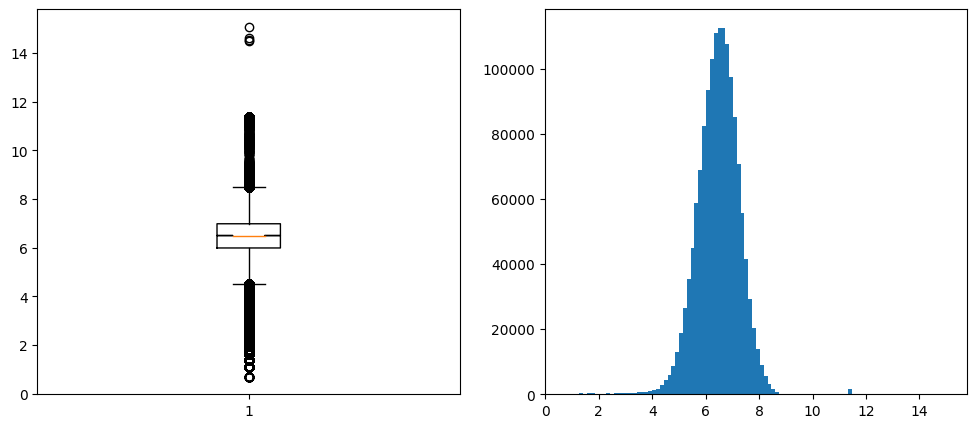

In [76]:
import matplotlib.pyplot as plt

### Your code is here
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
plt.boxplot(data['log_trip_duration'], notch=True)

ax1 = fig.add_subplot(1,2,2)
plt.hist(data['log_trip_duration'], bins=100)

plt.show()

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

In [77]:
### Your code is here
# q_low = data['log_trip_duration'].quantile(0.25)
# q_high = data['log_trip_duration'].quantile(0.75)

# iqr = q_high - q_low

# thresh_high = q_high + 1.5 * iqr
# thresh_low = q_low - 1.5 * iqr

thresh_high = data['log_trip_duration'].quantile(0.995)
thresh_low = data['log_trip_duration'].quantile(0.005)

print(f"Max value: {data['log_trip_duration'].max()}")
print(f"Min value: {data['log_trip_duration'].min()}")
print(f"Threshold high: {thresh_high}")
print(f"Threshold low: {thresh_low}")

data = data[(data['log_trip_duration'] >= thresh_low) & (data['log_trip_duration'] <= thresh_high)]

Max value: 15.075754899638106
Min value: 0.6931471805599453
Threshold high: 8.32845106681936
Threshold low: 3.9318256327243257


Снова замерьте качество на кросс-валидации, используя старый selector

In [78]:
### Your code is here
cv_results = cross_validate(
    estimator=LinearRegression(),
    X=data.drop(columns=['log_trip_duration']),
    y=data['log_trip_duration'],
    cv=selector,
    scoring=scorer
)
cross_val_error = cv_results['test_score'].mean()

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: 0.342
